In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys

import starry
sys.path.append("../volcano")
from utils import get_body_ephemeris
  
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18

%config InlineBackend.figure_format = 'retina'

np.random.seed(42)
starry.config.lazy = False

In [2]:
map = starry.Map(ydeg=5)

Pre-computing some matrices... Done.


In [3]:
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.1

Compiling `flux`... /Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()
Done.
/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


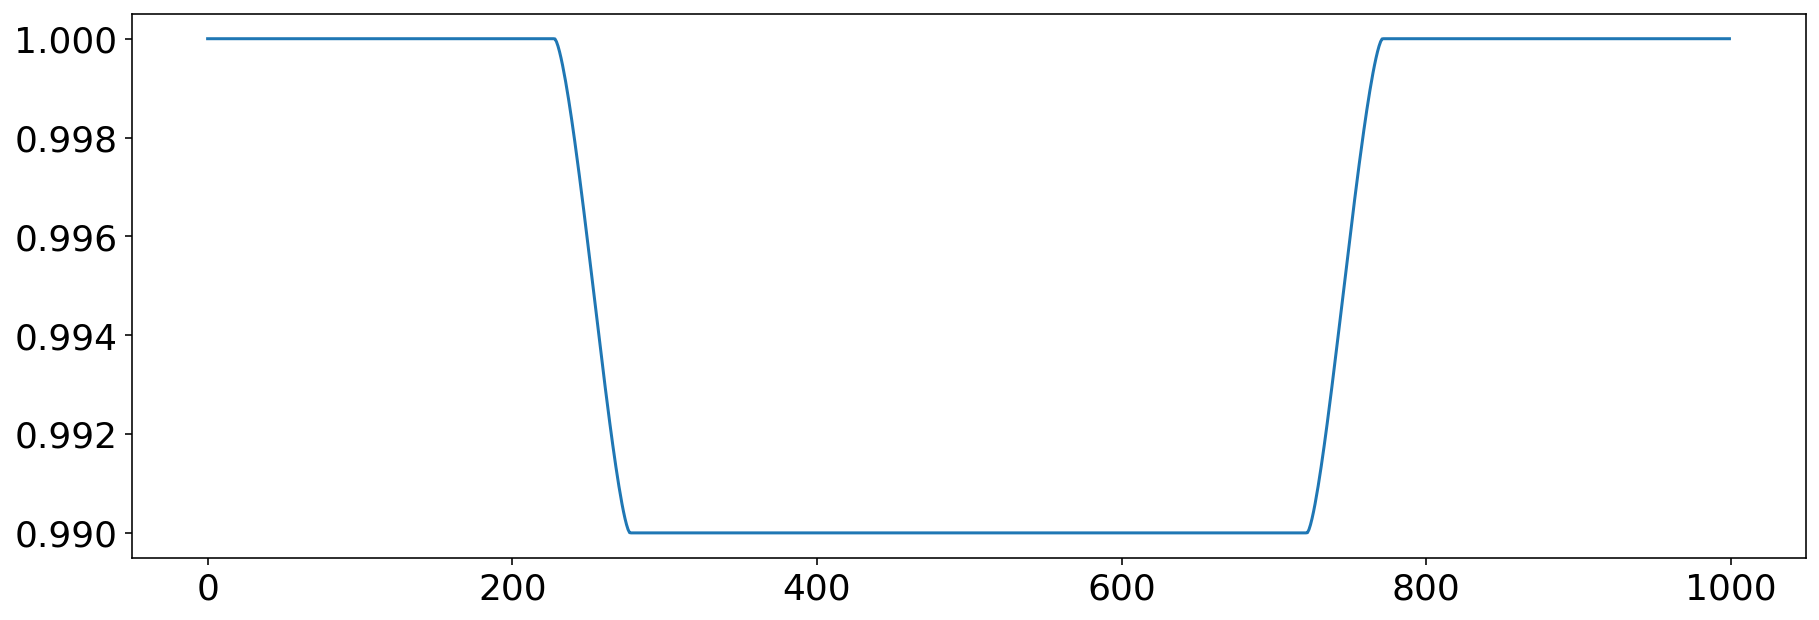

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(map.flux(xo=xo, yo=yo, zo=zo, ro=ro))

(0, 1)

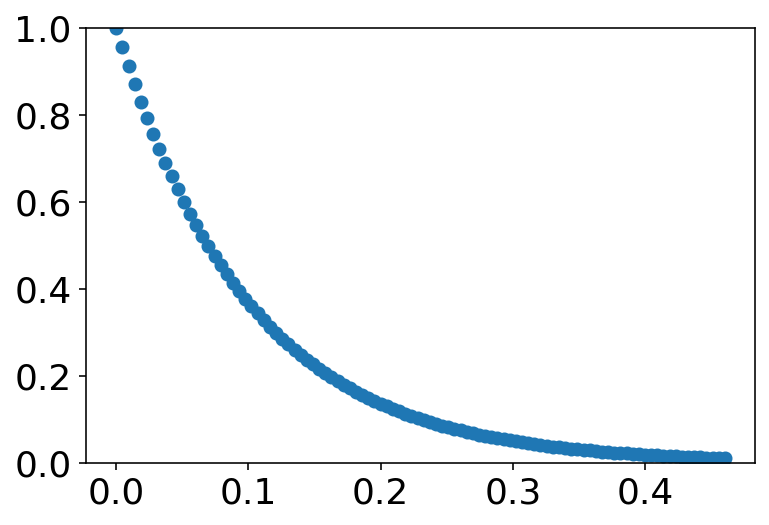

In [5]:
# Coefficients
H = 10 ** (-1.0)  # scale height
z = np.linspace(0, -H * np.log(0.01), 100)
C = np.exp(-z / H)

fig, ax = plt.subplots()
ax.plot(z, C, "C0o")
# ax.set_xlabel('R_jupiter')
ax.set_ylim(0, 1)

In [6]:
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.linspace(-0.3, 0.3, npts)
zo = 1.0
ro = 0.1

# Coefficients
z = np.linspace(0, -H * np.log(0.01), 50)
C = np.exp(-z / H)
r = 1 + z

# Compute flux for different sizes of the occulted body
f = np.zeros((len(r), len(xo)))
for i in range(len(f)):
    f[i] = map.flux(xo=xo / r[i], yo=yo / r[i], zo=zo / r[i], ro=ro / r[i])

# Weighted sum of fluxes in each annulus
total_flux = f[0] * C[0]
tmp = total_flux

for i in range(1, len(C)):
    total_flux += (f[i] - f[i - 1]) * C[i]

/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


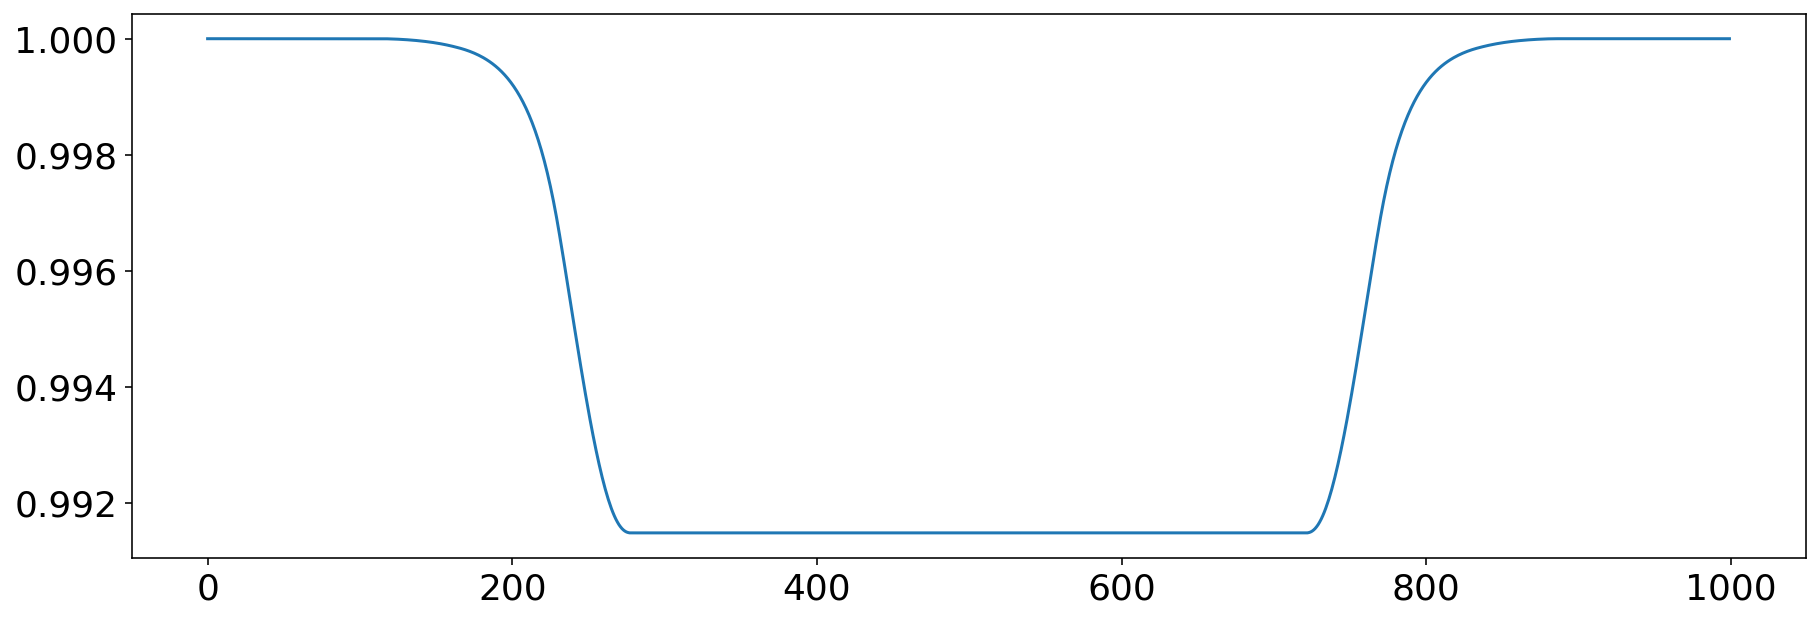

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

# ax.plot(map.flux(xo=xo, yo=yo, zo=zo, ro=r_occ[0]),'C0')

# ax.plot(map.flux(xo=xo, yo=yo, zo=zo, ro=ro), 'C0')
ax.plot(total_flux, "C0")

In [8]:
def compute_flux(map, xo, yo, ro, H, fuzzy="occulted", n_annuli=100):
    """
    Compute flux for an occultation of a fuzzy starry map by
    an occultor of certain radius.
    """
    # Coefficients
    z = np.linspace(0, -H * np.log(0.001), n_annuli)
    C = np.exp(-z / H)
    r = 1 + z

    # Compute flux for different sizes of either the occulted body or
    # the occultor
    f = np.zeros((len(r), len(xo)))

    if fuzzy == "occulted":
        for i in range(len(f)):
            f[i] = map.flux(xo=xo / r[i], yo=yo / r[i], zo=1.0, ro=ro / r[i])
    else:
        for i in range(len(f)):
            f[i] = map.flux(xo=xo, yo=yo, zo=1.0, ro=ro * r[i])

    # Weighted sum of fluxes in each annulus
    flux = f[0] * C[0]

    for i in range(1, len(C)):
        flux += (f[i] - f[i - 1]) * C[i]

    return flux

In [9]:
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-2.0, 2.0, npts)
yo = np.zeros(len(xo))
zo = 1.0
ro = 0.05

/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

Text(0.5, 1.0, 'Transit over a fuzzy map')

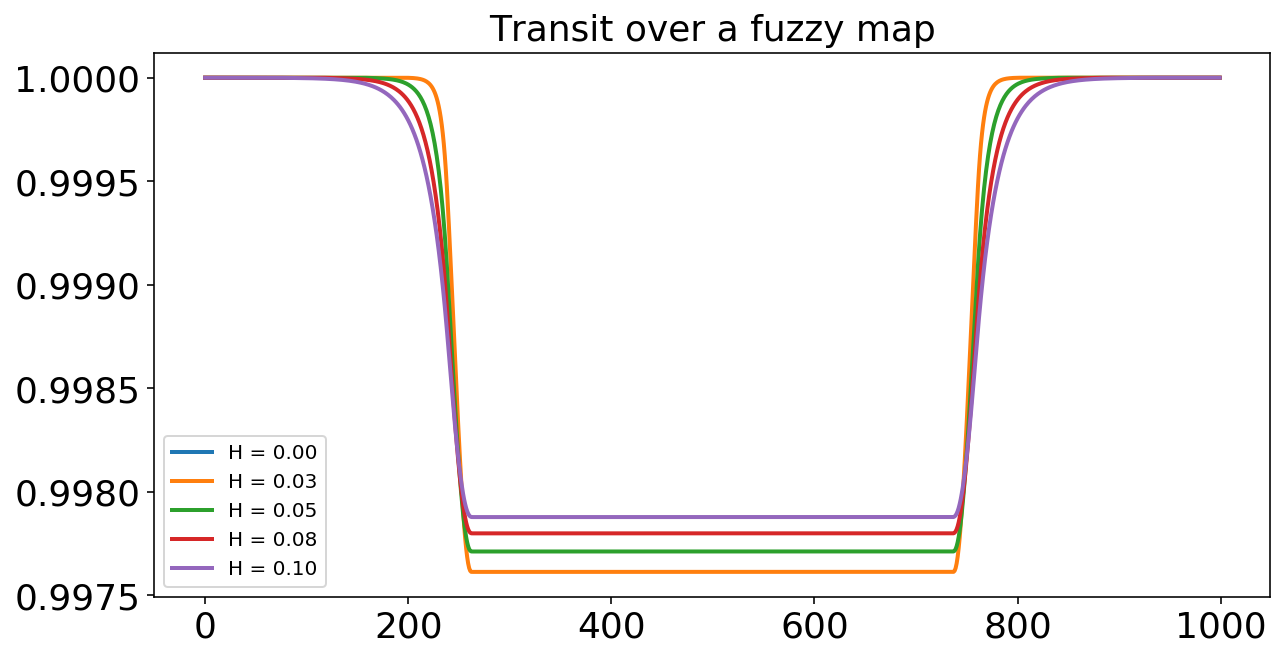

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

H = np.linspace(0, 0.1, 5)
for i, h in enumerate(H):
    total_flux = compute_flux(map, xo, yo, ro, h)
    ax.plot(total_flux, f"C{i}", lw=2.0, label=f"H = {h:.2f}")

ax.legend()
ax.set_title("Transit over a fuzzy map")

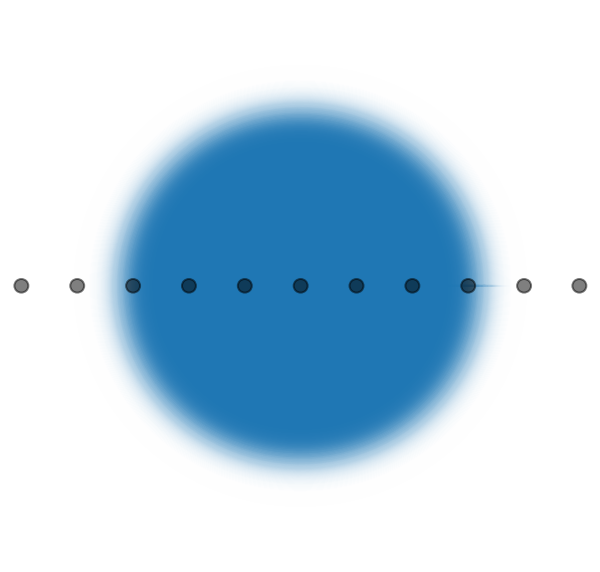

In [11]:
def plot_annulus(ax, rin, rout, alpha=1.0):
    n, radii = 100, [rin, rout]
    theta = np.linspace(0, 2 * np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))
    ys = np.outer(radii, np.sin(theta))

    # in order to have a closed area, the circles
    # should be traversed in opposite directions
    xs[1, :] = xs[1, ::-1]
    ys[1, :] = ys[1, ::-1]

    ax.fill(np.ravel(xs), np.ravel(ys), color="C0", alpha=alpha)


H = 0.1
z = np.linspace(0, -H * np.log(0.001), 100)
C = np.exp(-z / H)
r = 1 + z

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")

plot_annulus(ax, 0.0, 1.0, alpha=1.0)

for i in range(len(r)):
    plot_annulus(ax, 1.0, r[i], alpha=C[i])

for n in list(range(0, npts, npts // 10)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.5
    )
    ax.add_patch(circ)

In [12]:
npts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-20.0, 20.0, npts)
yo = np.zeros(len(xo))
zo = 1.0
ro = 10.0

/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

Text(0.5, 1.0, 'Occultation by a fuzzy occultor')

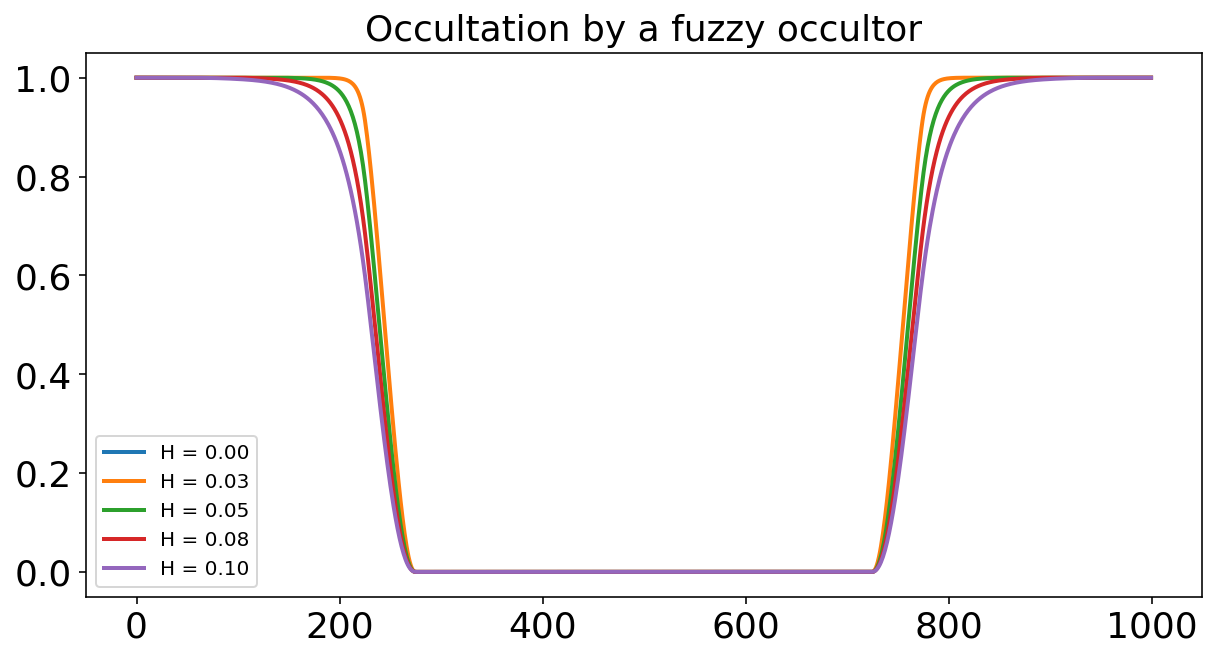

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

H = np.linspace(0, 0.1, 5)
for i, h in enumerate(H):
    total_flux = compute_flux(map, xo, yo, ro, h, fuzzy="occultor")
    ax.plot(total_flux, f"C{i}", lw=2.0, label=f"H = {h:.2f}")

ax.legend()
ax.set_title("Occultation by a fuzzy occultor")

Compiling `render`... Done.


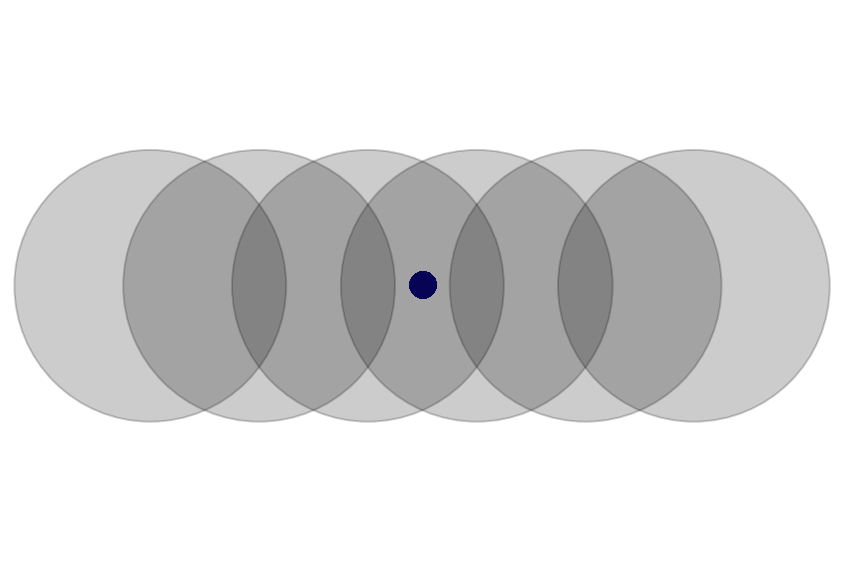

In [14]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 5)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.2
    )
    ax.add_patch(circ)

In [15]:
# For Io
qnpts = 1000
time = np.linspace(0, 1, npts)
xo = np.linspace(-60.0, 60.0, npts)
yo = np.zeros(len(xo))
zo = 1.0
ro = 69911 / 1821.3  # radius of Jupiter

In [16]:
27 / (2 * np.pi * 1821.3) * 180 / np.pi

0.13518392151259034

/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/fbartolic/anaconda3/envs/io/lib/python3.8/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


Text(0.5, 1.0, 'Occultation of Io by Jupiter')

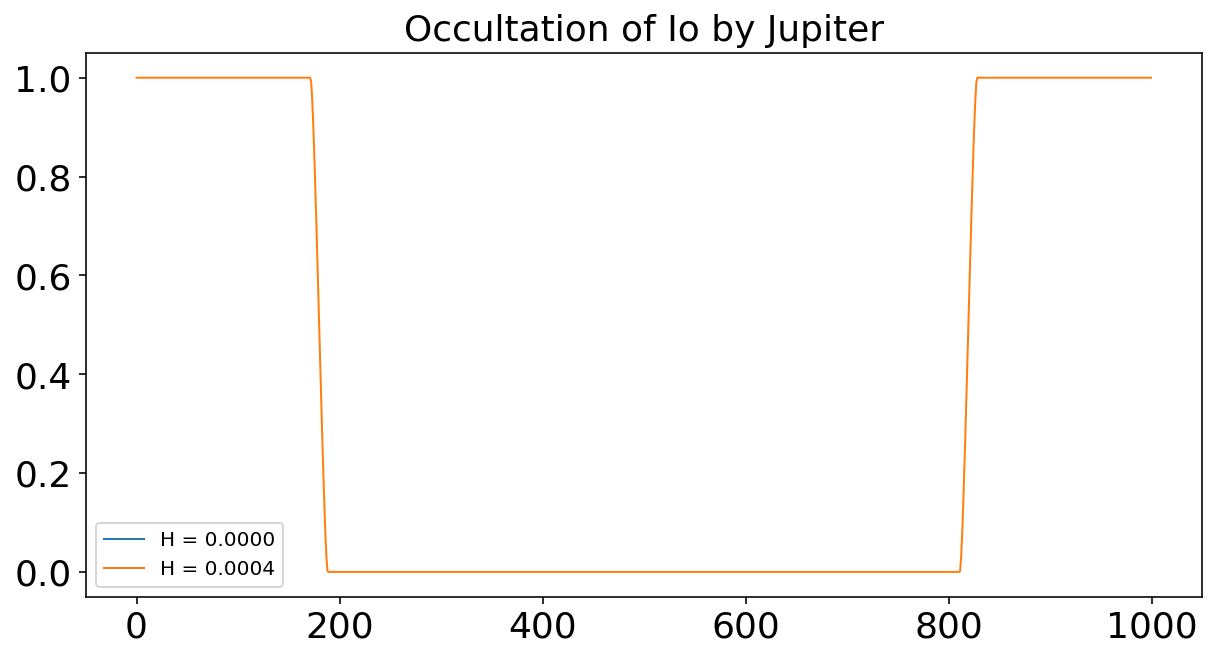

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

H = np.array([0, 27 / 69911])
for i, h in enumerate(H):
    total_flux = compute_flux(map, xo, yo, ro, h, fuzzy="occultor")
    ax.plot(total_flux, f"C{i}", lw=1.0, label=f"H = {h:.4f}")

ax.legend()
ax.set_title("Occultation of Io by Jupiter")

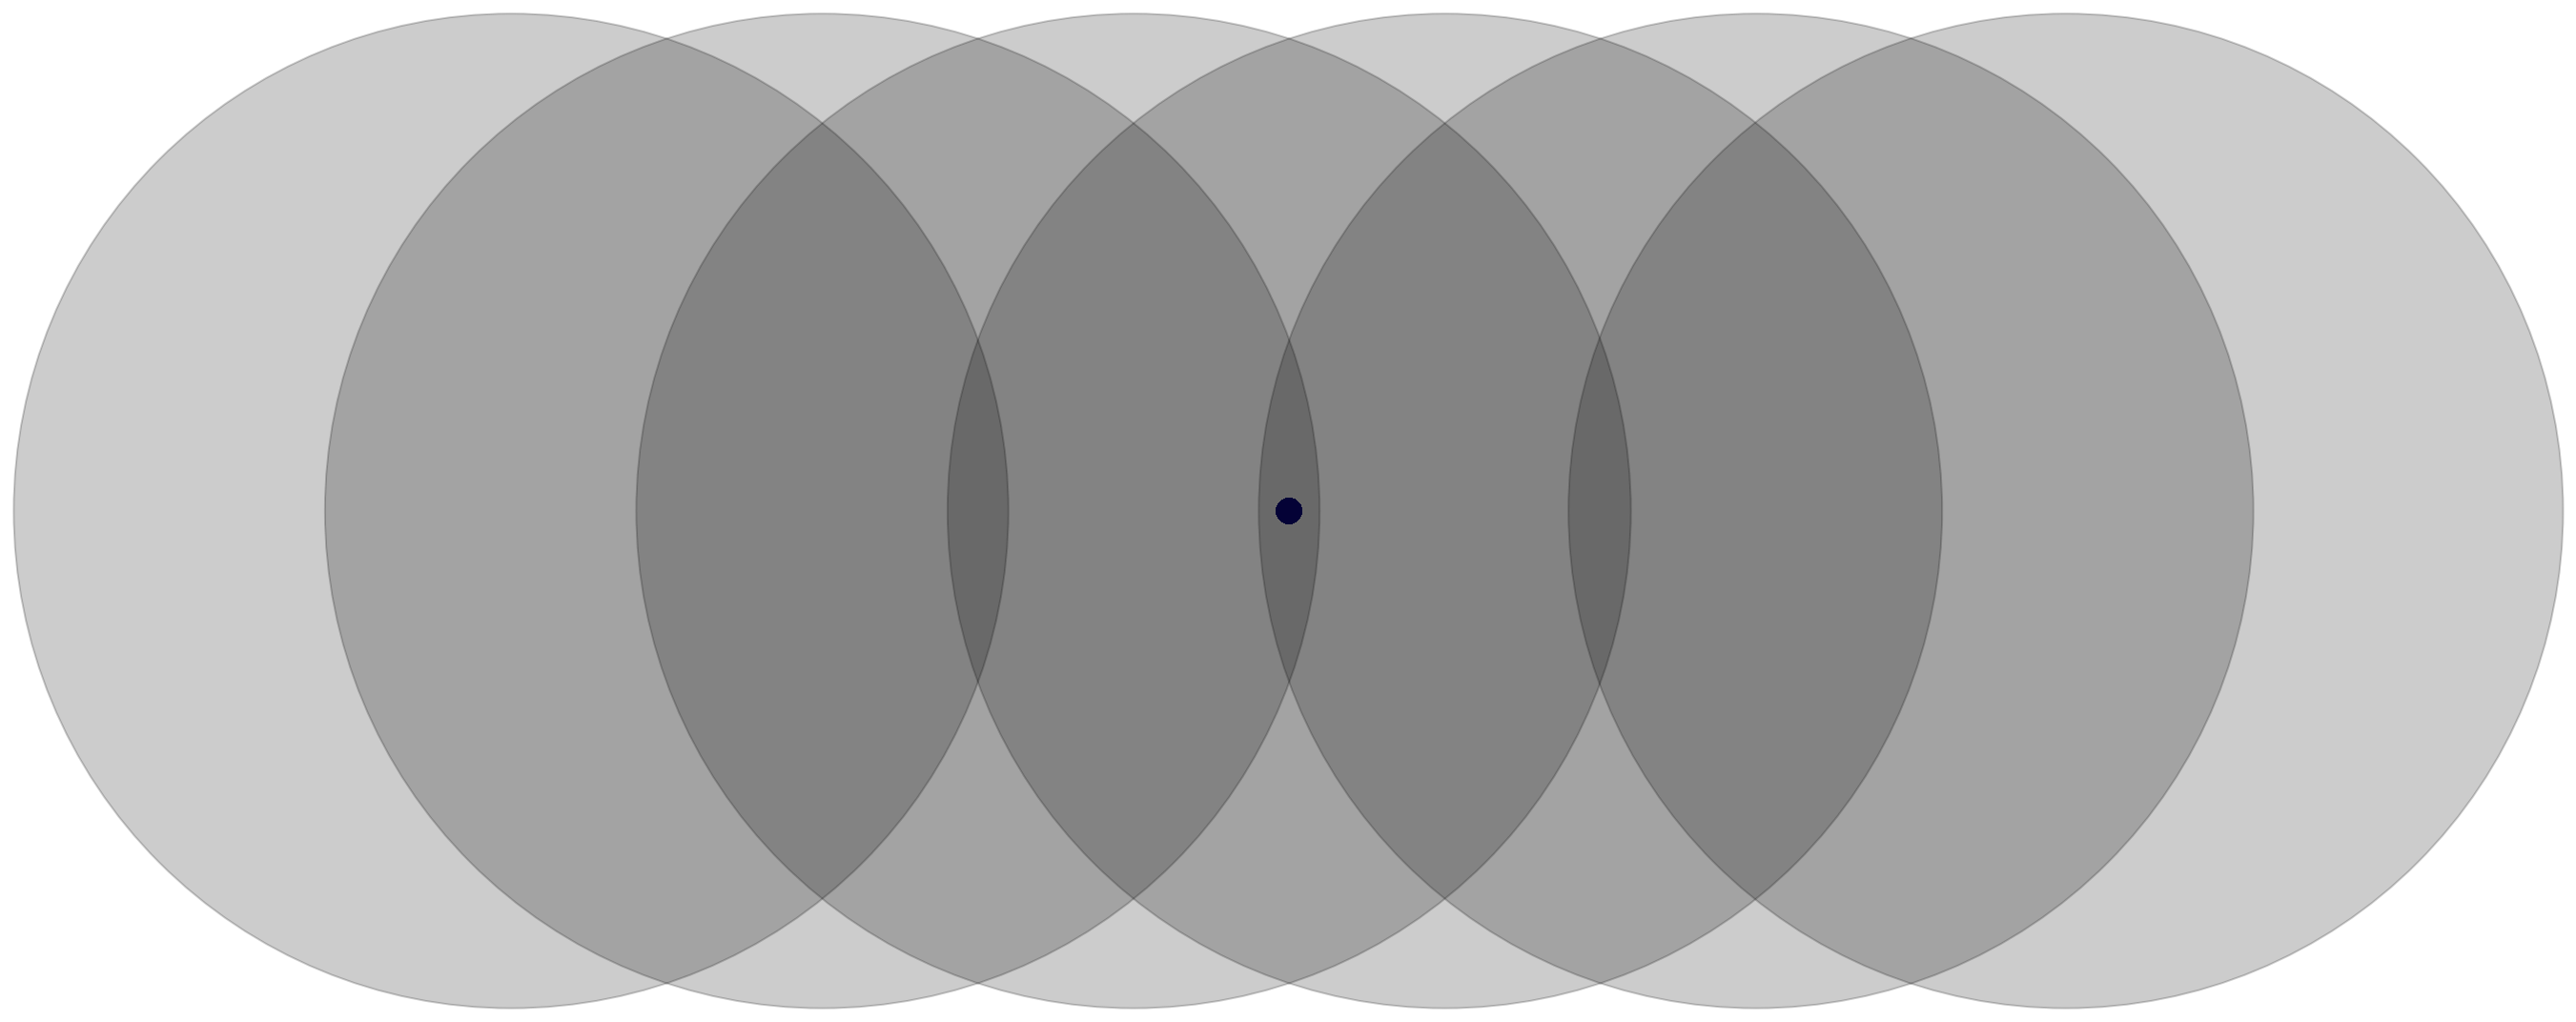

In [18]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.axis("off")
ax.imshow(map.render(), origin="lower", cmap="plasma", extent=(-1, 1, -1, 1))
for n in list(range(0, npts, npts // 5)) + [npts - 1]:
    circ = plt.Circle(
        (xo[n], yo[n]), radius=ro, color="k", fill=True, clip_on=False, alpha=0.2
    )
    ax.add_patch(circ)